<a href="https://colab.research.google.com/github/joaovitordeon/ML_diabetes/blob/master/diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [0]:
df = pd.read_excel('diabetes_Ex1.xlsx')

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 18 columns):
A              768 non-null float64
B              768 non-null float64
C              774 non-null object
D              768 non-null float64
E              768 non-null float64
F              768 non-null float64
G              768 non-null float64
H              768 non-null float64
I              768 non-null float64
J              768 non-null float64
K              768 non-null float64
L              768 non-null float64
M              768 non-null float64
N              768 non-null float64
O              768 non-null float64
P              768 non-null float64
Unnamed: 16    0 non-null float64
Diagnóstico    768 non-null float64
dtypes: float64(17), object(1)
memory usage: 109.2+ KB


**Coluna 'Unnamed: 16' com todos os dados nulos**

In [0]:
df.drop(columns='Unnamed: 16', inplace=True)
df.dropna(inplace=True, axis='index')

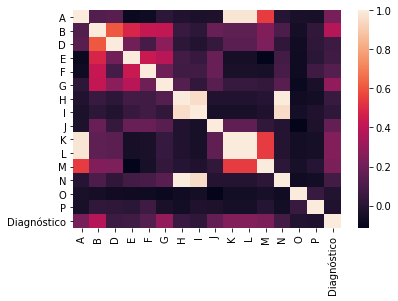

In [0]:
g = sns.heatmap(df.corr())

**Features K,L,H,I com alta correlação com outras colunas**

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 0 to 767
Data columns (total 17 columns):
A              768 non-null float64
B              768 non-null float64
C              768 non-null object
D              768 non-null float64
E              768 non-null float64
F              768 non-null float64
G              768 non-null float64
H              768 non-null float64
I              768 non-null float64
J              768 non-null float64
K              768 non-null float64
L              768 non-null float64
M              768 non-null float64
N              768 non-null float64
O              768 non-null float64
P              768 non-null float64
Diagnóstico    768 non-null float64
dtypes: float64(16), object(1)
memory usage: 108.0+ KB


**Coluna C do tipo object**

In [0]:
df=df.astype(float)

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 0 to 767
Data columns (total 17 columns):
A              768 non-null float64
B              768 non-null float64
C              768 non-null float64
D              768 non-null float64
E              768 non-null float64
F              768 non-null float64
G              768 non-null float64
H              768 non-null float64
I              768 non-null float64
J              768 non-null float64
K              768 non-null float64
L              768 non-null float64
M              768 non-null float64
N              768 non-null float64
O              768 non-null float64
P              768 non-null float64
Diagnóstico    768 non-null float64
dtypes: float64(17)
memory usage: 108.0 KB


In [0]:
import warnings
warnings.filterwarnings("ignore")

def split_data(clf,features,labels, folds = 150): 
    
    accuracy_scores = []
    precision_scores = []
    recall_scores = []
    f1_scores = []

    sss = StratifiedShuffleSplit(n_splits=folds,random_state=42, test_size=0.3)
    
    print("Making predictions... \n")
    for train_idx, test_idx in sss.split(features, labels):
        X_train = []
        X_test  = []
        y_train = []
        y_test  = []

        for ii in train_idx:
            X_train.append( features.loc[ii] )
            y_train.append( labels.loc[ii] )
        for jj in test_idx:
            X_test.append( features.loc[jj] )
            y_test.append( labels.loc[jj] )
        
        try:
            clf.fit(X_train, y_train)
            y_pred = clf.predict(X_test)

            accuracy_scores.append(accuracy_score(y_test, y_pred))
            precision_scores.append(precision_score(y_test, y_pred))
            recall_scores.append(recall_score(y_test, y_pred))
            f1_scores.append(f1_score(y_test, y_pred))
        except e:
            print(e)
            
    print('Accuracy', np.round( np.mean(accuracy_scores) ,3) )
    print('Precision', np.round( np.mean(precision_scores) ,3) )
    print('Recall', np.round( np.mean(recall_scores), 3) )
    print('F1-measure', np.round( np.mean(f1_scores), 3) )
    

In [0]:
reg =  LogisticRegression()

In [0]:
rfc = RandomForestClassifier()

In [0]:
gnb = GaussianNB()

In [0]:
#LogisticRegression
split_data(reg, df.drop(columns='Diagnóstico'), df['Diagnóstico'])

Making predictions... 

Accuracy 0.755
Precision 0.786
Recall 0.857
F1-measure 0.82


In [0]:
#RandomForestClassifier
split_data(rfc, df.drop(columns='Diagnóstico'), df['Diagnóstico'])

Making predictions... 

Accuracy 0.737
Precision 0.763
Recall 0.864
F1-measure 0.81


In [0]:
#GaussianNB
split_data(gnb, df.drop(columns='Diagnóstico'), df['Diagnóstico'])

Making predictions... 

Accuracy 0.745
Precision 0.8
Recall 0.81
F1-measure 0.804


**precision: das vezes que ele preveu um diabetico, 80% eram diabeticos realmente e 20% não eram **

**recall: dentre os diabeticos, ele preveu que 81% destes eram realmente diabeticos, o que inplica que 19% dos diabeticos nao foram diagnosticados com diabetes**